# Digit Recognition Challange

### Start here if...
You have some experience with R or Python and machine learning basics, but you’re new to computer vision. This competition is the perfect introduction to techniques like neural networks using a classic dataset including pre-extracted features.

## Competition Description
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

### Practice Skills
Computer vision fundamentals including simple neural networks

Classification methods such as SVM and K-nearest neighbors

### Acknowledgements 
More details about the dataset, including algorithms that have been tried on it and their levels of success, can be found at http://yann.lecun.com/exdb/mnist/index.html. The dataset is made available under a Creative Commons Attribution-Share Alike 3.0 license.


## Data
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

000 001 002 003 ... 026 027

028 029 030 031 ... 054 055

056 057 058 059 ... 082 083

 |   |   |   |  ...  |   |

728 729 730 731 ... 754 755

756 757 758 759 ... 782 783 


The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:

ImageId,Label
1,3
2,7
3,8 
(27997 more lines)
The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.

In [1]:
# SET UP ENVIRONMENT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
DIR = 'C:\\Users\\Lenovo\\PycharmProjects\\Kaggle\\Project4_Digit_Recognition\\'


In [2]:
# READ DATA
train_set = pd.read_csv(DIR + 'train.csv')


### Convert Grayscale to matplotlib format

Because pixels are saved in format int(0-255) and matplotlib plots read float point [0, 1], therefore for purpose of showing images of those numbers I need to convert them

In [62]:
# convert to matplotlib colors 
train_subset = pd.DataFrame()

for x in range(10):
    train_subset = pd.concat([train_subset, train_set.query('label == @x').head(10)], axis=0, ignore_index=True)
   
train_subset.iloc[:, 1:] = train_subset.iloc[:, 1:].applymap(lambda x: round((255 - x)/ 255, 2))

## Showing the numbers

This part is done only to visualize how the pixels colors corresponds to numbers and to show couple of different handwritting to have better feel. 

1. First method is using subplots as separate pixels and print different numbers in different plots. However, this methods is very timeconsuimg and I left it because I did it firstly and I don't recommend to run it

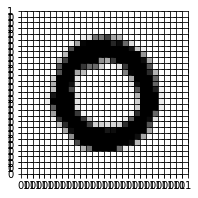

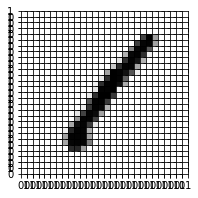

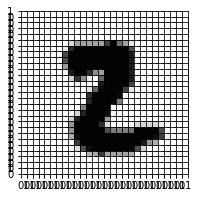

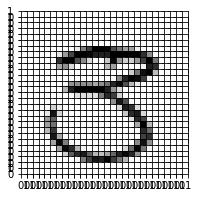

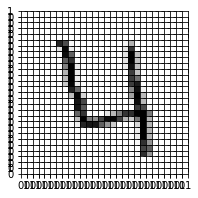

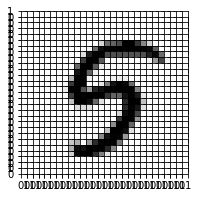

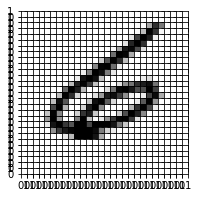

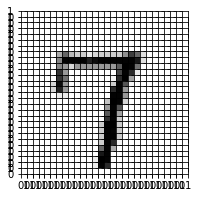

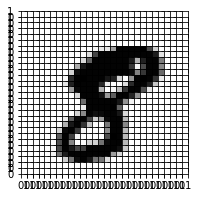

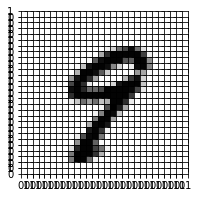

In [31]:
# DO NOT RUN
for x in [1, 0, 16, 7, 3, 8, 21, 6, 10, 11]:        # this list of rows is not working anymore. 
    fig, ax = plt.subplots(28, 28, figsize=(3, 3), sharey='row', sharex='col')
    fig.subplots_adjust(hspace=0, wspace=0)

    column = 0
    for i in range(28):
        for j in range(28):
            color = train_subset.ix[x, column]       
            ax[i, j].set_facecolor(str(color))
            
            column += 1

2. Second Method is run by transforming each row to 28x28 array and use it to create image in each subplot. This is much more efficient method and simply better becuase we can see multiple handwritting digits on one plot. 

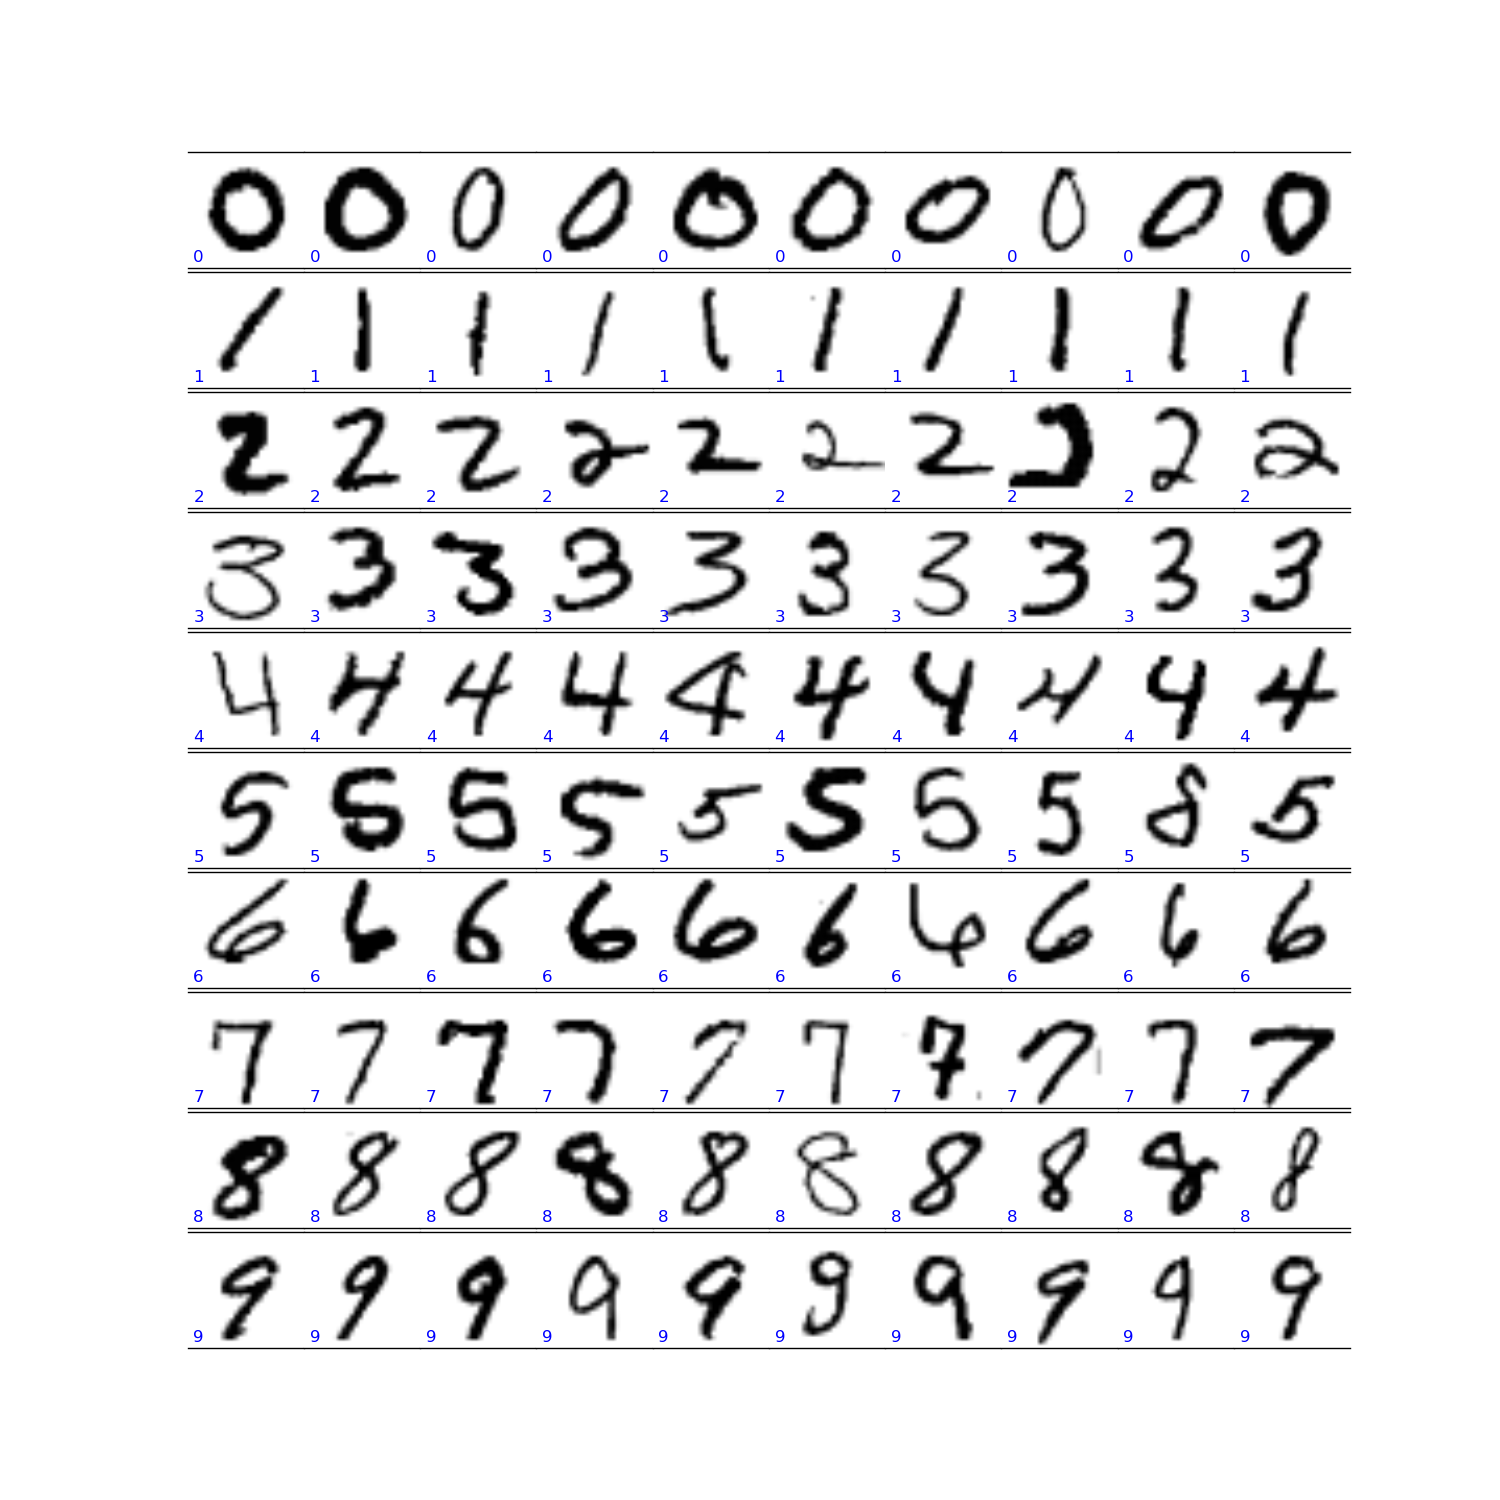

In [81]:
#plt.style.use('seaborn-bright')

fig, axes = plt.subplots(10, 10, figsize=(15, 15),
                    sharex=True, sharey=True,
                    subplot_kw={'xticks':[], 'yticks':[]},
                    gridspec_kw=dict(hspace=0, wspace=0))

for x, ax in enumerate(axes.flat):
    
    train_zero = np.empty(shape=(28, 28))
    column = 1                  # because column=0 is label
    
    for i in range(28):
        for j in range(28):
            
            train_zero[i, j] = train_subset.iloc[x, column]
            
            column += 1
    
    ax.imshow(train_zero, cmap='gray')
    ax.text(0.05, 0.05, str(train_subset.label[x]),
               transform=ax.transAxes, color='blue')
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

fig.savefig(DIR + 'Numbers.png')

## display figure (somehow it doesn't work automatically - maybe because memory issue. 
from IPython.display import Image
Image(DIR + 'Numbers.png')

## Summary: Showing numbers

Above graph has showed something interesting. The variety in different hand writting is much bigger than I thought. This will be a challange for machine learning techniques. 